In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os

In [13]:
os.chdir('/Users/parkseongtae/Desktop/Python') 

In [14]:
print("현재 디렉토리", os.getcwd())

현재 디렉토리 /Users/parkseongtae/Desktop/python


In [16]:
print("현재 디렉토리의 파일 목록:", os.listdir())

현재 디렉토리의 파일 목록: ['키오스크 만들기', 'Untitled1.ipynb', '.DS_Store', 'Untitled-1.ipynb', '.pytest_cache', '__pycache__', 'trip.csv', '1-pandas.ipynb', '키오스크.py', '.vscode', 'pandas-data-analysis-main', 'pandas', '직사각형 넓이 구하기.project']


In [17]:
data = pd.read_csv('trip.csv')

In [18]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [20]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [21]:
#결측치 비율 확인 
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [22]:
#결측치 확인 
data[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [23]:
#Nan을 평균으로 채우기 
data['fare_amount'] = data['fare_amount'].fillna(data['fare_amount'].mean())

In [24]:
#Nan 없어진거 확인
data[data['fare_amount'].isna()] 

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [25]:
#주행시간 구하기 1. 데이터 타입변경 
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [26]:
#주행시간 구하기 2. 둘이 뺴기 
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

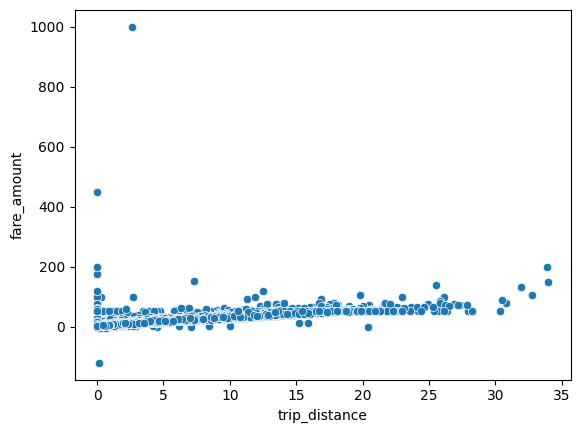

In [27]:
#운행요금 vs 주행거리 운임요금 상관관계 파악 
sns.scatterplot(x=data['trip_distance'], y=data['fare_amount'])

<Axes: xlabel='trip_duration', ylabel='fare_amount'>

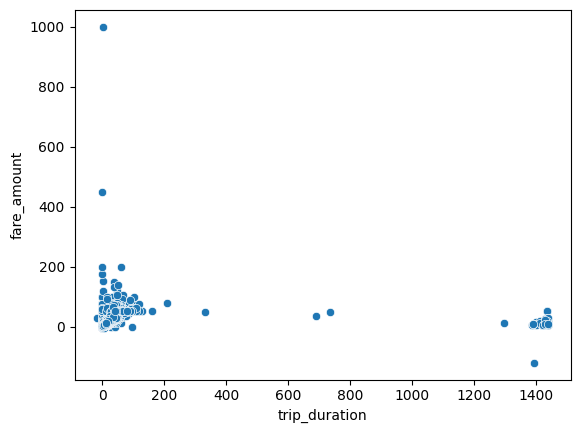

In [28]:
#주행시간 vs 운임비용 상관관계 
sns.scatterplot(x=data['trip_duration'], y=data['fare_amount']) 

In [29]:
data['trip_duration'].dtype

dtype('float64')

In [31]:
#1000, 400 값이 너무 이상한거 같음 삭제 - 200이상의 데이터 삭제 
data = data[data['fare_amount'].apply(lambda x: True if 1 <= x <= 200 else False)]

In [32]:
data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration
count,22676,22676,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,2017-06-29 07:31:03.278400,2017-06-29 07:48:00.890192128,1.643588,2.913428,12.972813,1.826672,0.311590,16.960197
min,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,0.000000,0.000000,-16.983333
25%,2017-03-30 02:22:36.249999872,2017-03-30 02:33:54.249999872,1.000000,1.000000,6.500000,0.000000,0.000000,6.666667
50%,2017-06-23 13:11:56.500000,2017-06-23 13:21:02.500000,1.000000,1.610000,9.500000,1.350000,0.000000,11.183333
75%,2017-10-02 10:26:02,2017-10-02 10:39:51.500000,2.000000,3.070000,14.500000,2.450000,0.000000,18.383333
max,2017-12-31 23:45:30,2017-12-31 23:49:24,36.000000,33.960000,200.000000,55.500000,19.100000,1439.550000
std,NaN,NaN,1.304922,3.646358,11.024997,2.450906,1.395441,61.343702


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

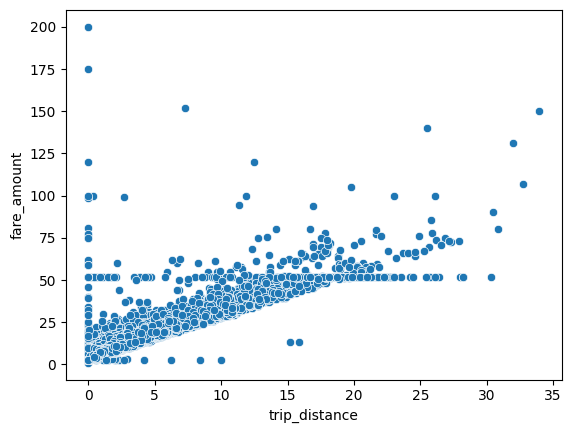

In [33]:
#결측치 제거 후 운행요금 vs 주행거리 운임요금 상관관계 파악 
sns.scatterplot(x=data['trip_distance'], y=data['fare_amount']) 

In [34]:
correlation_matrix = data[['trip_distance', 'trip_duration', 'fare_amount']].corr()

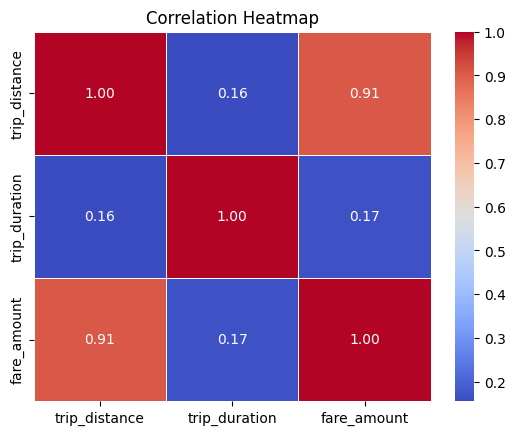

In [35]:
# 히트맵 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#거리가 길수록 요금이 비싸짐
#운행시간이 길수록 이동거리도 길어짐
#운행 시간이 길다고 무조건 요금이 높은 것은 아님

In [36]:
#Credit Card와 Debit Card를 구분없이 "Card"로 
data['payment_method'] = data['payment_method'].replace({'Credit Card' : 'Card', 'Debit Card': 'Card'})

In [37]:
data['payment_method']

0        Card
1        Card
2        Card
3        Cash
4        Card
         ... 
22696    Cash
22697    Cash
22698    Card
22699    Card
22700    Cash
Name: payment_method, Length: 22676, dtype: object